In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [23]:
flights_csv = 'flight_LAX_ATL_combined_0701_0831_clean_data.csv'

flights = pd.read_csv(flights_csv)

In [6]:
flights

,Price,Company Name,Stops,Duration,Destination,From,Date
0,393,United Airlines,1 stop,8h 18m,ATL,LAX,2023-07-01
1,679,Delta,nonstop,4h 29m,ATL,LAX,2023-07-01
2,252,Spirit Airlines,1 stop,8h 52m,ATL,LAX,2023-07-01
3,509,American Airlines,1 stop,7h 07m,ATL,LAX,2023-07-01
4,344,American Airlines,1 stop,9h 05m,ATL,LAX,2023-07-01
...,...,...,...,...,...,...,...
26228,1174,"Avianca, JetBlue",3 stops,32h 56m,ATL,LAX,2023-08-31
26229,1174,"Avianca, JetBlue",3 stops,37h 39m,ATL,LAX,2023-08-31
26230,1201,"Avianca, JetBlue",3 stops,37h 39m,ATL,LAX,2023-08-31
26231,1174,"Avianca, JetBlue",3 stops,38h 34m,ATL,LAX,2023-08-31


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [24]:
def preprocess(df):

  le = LabelEncoder()

  df['Date'] = le.fit_transform(df['Date'])
  df['Company Name'] = le.fit_transform(df['Company Name'])
  df['Stops'] = le.fit_transform(df['Stops'])

  df['Price'] = df['Price'].str[1:].str.replace(',','').astype(int)
  #df['Price'] = normalize(np.array(df['Price']).reshape(1,-1)).flatten()

preprocess(flights)

X = flights[['Date', 'Company Name', 'Stops']]
X = np.array(X)
y = flights['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [25]:
X

array([[ 0, 17,  0],
       [ 0,  9,  3],
       [ 0, 13,  0],
       ...,
       [61,  5,  2],
       [61,  5,  2],
       [61,  5,  2]])

In [26]:
X_train.shape, y_train.shape

((18363, 3), (18363,))

In [93]:
model = tf.keras.models.Sequential([
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(1)
])

In [94]:
model.compile(optimizer = 'adam', loss = 'huber')

In [96]:
history = model.fit(X_train, y_train, epochs = 20, verbose = 1, validation_split = .2)

Epoch 1/20
460/460 [==============================] - 4s 9ms/step - loss: 92.4568 - val_loss: 91.9255
Epoch 2/20
460/460 [==============================] - 5s 10ms/step - loss: 91.7504 - val_loss: 96.1743
Epoch 3/20
460/460 [==============================] - 4s 8ms/step - loss: 92.1491 - val_loss: 93.2449
Epoch 4/20
460/460 [==============================] - 4s 8ms/step - loss: 91.0840 - val_loss: 92.8854
Epoch 5/20
460/460 [==============================] - 5s 12ms/step - loss: 92.2748 - val_loss: 90.2689
Epoch 6/20
460/460 [==============================] - 4s 8ms/step - loss: 90.3090 - val_loss: 89.5513
Epoch 7/20
460/460 [==============================] - 4s 8ms/step - loss: 90.2483 - val_loss: 90.5261
Epoch 8/20
460/460 [==============================] - 4s 9ms/step - loss: 90.0326 - val_loss: 95.1625
Epoch 9/20
460/460 [==============================] - 5s 10ms/step - loss: 89.6163 - val_loss: 90.2749
Epoch 10/20
460/460 [==============================] - 4s 8ms/step - loss: 89.6

In [39]:
history.history

{'loss': [17856.326171875,
  17789.15234375,
  17804.4609375,
  17770.876953125,
  17806.296875,
  17692.9375,
  17654.55078125,
  17669.111328125,
  17620.37109375,
  17581.037109375,
  17645.544921875,
  17581.640625,
  17496.798828125,
  17539.4609375,
  17521.689453125,
  17628.462890625,
  17518.833984375,
  17478.1484375,
  17502.341796875,
  17406.953125],
 'val_loss': [20659.72265625,
  20838.365234375,
  20592.224609375,
  20797.375,
  21114.783203125,
  20784.390625,
  20470.732421875,
  21038.201171875,
  20554.5390625,
  20946.689453125,
  20576.03515625,
  20616.876953125,
  20562.744140625,
  20496.140625,
  20343.830078125,
  21001.00390625,
  20390.638671875,
  21437.13671875,
  20339.7265625,
  20339.2265625]}

In [97]:
model.evaluate(X_test, y_test, verbose = 2)

246/246 - 1s - loss: 85.9830 - 510ms/epoch - 2ms/step


85.98295593261719

In [98]:
preds = model.predict(X_test)[:20]

246/246 [==============================] - 1s 3ms/step


In [99]:
preds = preds.flatten()
preds

array([278.60605, 657.68945, 376.0362 , 200.89415, 362.87402, 452.766  ,
       700.4905 , 314.39255, 348.631  , 369.6058 , 478.77042, 263.32724,
       452.89163, 417.8419 , 387.07755, 342.4356 , 386.61917, 335.41476,
       379.99292, 654.77356], dtype=float32)

In [100]:
actual = np.array(y_test[:20])
actual

array([397, 840, 264, 202, 357, 487, 773, 368, 688, 633, 487, 288, 348,
       313, 394, 324, 507, 419, 264, 783])

In [102]:
actual - preds

array([ 118.39395142,  182.31054688, -112.03619385,    1.10585022,
         -5.87402344,   34.23400879,   72.50952148,   53.60745239,
        339.36898804,  263.39419556,    8.22958374,   24.67276001,
       -104.89163208, -104.84188843,    6.92245483,  -18.43560791,
        120.38082886,   83.5852356 , -115.99291992,  128.22644043])

(array([9.5500e+03, 1.0105e+04, 4.0560e+03, 2.2010e+03, 2.5200e+02,
        3.9000e+01, 1.3000e+01, 9.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([ 100. ,  321.9,  543.8,  765.7,  987.6, 1209.5, 1431.4, 1653.3,
        1875.2, 2097.1, 2319. ]),
 <BarContainer object of 10 artists>)

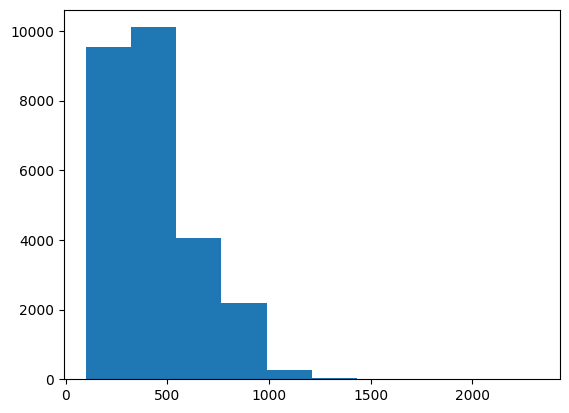

In [70]:
plt.hist(flights['Price'])

In [103]:
flights['Price'].min(), flights['Price'].max()

(100, 2319)

In [104]:
from matplotlib import pyplot as plt

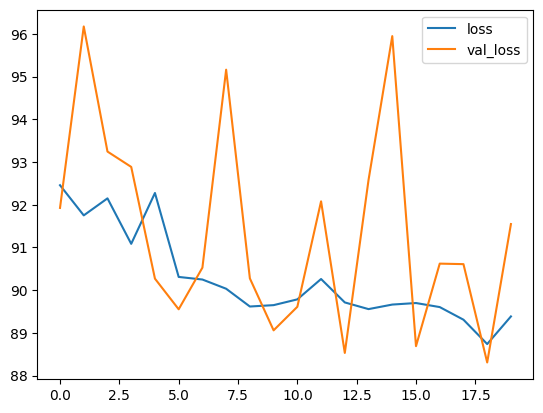

In [105]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()